In [1]:
import os
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_xgb_cv_predict,plot_roc

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
x,y=load_data(hla_representation='simple',seq_representation='simple')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 1.13809609413 s


In [3]:
#model params
params = {'max_depth':9,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'logloss',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,x,y,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-logloss:0.683948	eval-logloss:0.684543
[500]	train-logloss:0.313040	eval-logloss:0.460133
[1000]	train-logloss:0.231303	eval-logloss:0.446835
Stopping. Best iteration:
[1108]	train-logloss:0.218293	eval-logloss:0.445203

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-logloss:0.683953	eval-logloss:0.684371
[500]	train-logloss:0.310336	eval-logloss:0.463382
[1000]	train-logloss:0.224846	eval-logloss:0.451987
Stopping. Best iteration:
[875]	train-logloss:0.239992	eval-logloss:0.451891

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-logloss:0.683636	eval-logloss:0.684277
[500]	train-logloss:0.313510	eval-logloss:0.464551
[1000]	train-logloss:0.225741	eval-logloss:0.451785
Stopping. Best iteration:
[1020]	train-logloss:0.223311	eval-logloss:0.451581

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-logloss:0.684042	eval-logloss:0.684403
[500]	train-logloss

### ROC plot

AUC: 0.869605884216


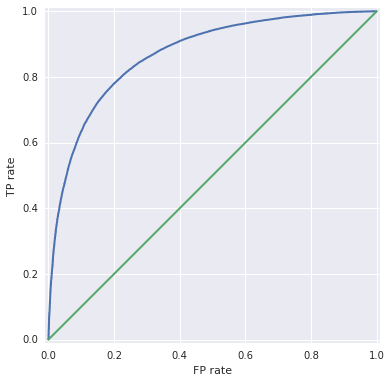

In [4]:
plot_roc(y,y_pred)